# 📊 Feature Group Detailed Analysis
## Hull Tactical Market Prediction - Phase 2

**Date:** 2025-11-11

**Objectives:**
1. 모든 Feature 그룹별 시계열 분석 (E, V, M, I, P, S, D)
2. 각 Feature의 통계적 특성 파악
3. Feature 간 시간에 따른 패턴 비교
4. 이상치 및 트렌드 탐지
5. 그룹별 비교 분석

## 1. Setup and Imports

In [2]:
# Standard libraries
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Get project root
notebook_dir = os.getcwd() if '__file__' not in dir() else os.path.dirname(os.path.abspath(__file__))
project_root = os.path.dirname(notebook_dir) if 'notebooks' in notebook_dir else notebook_dir
sys.path.insert(0, project_root)

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Project utilities
from src.data import DataLoader
from src.utils import set_seed, load_config

# Load configuration
config_path = os.path.join(project_root, 'conf', 'params.yaml')
config = load_config(config_path)
set_seed(config['seed'])

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['figure.dpi'] = 100

print('✅ Setup complete!')
print(f'📋 Seed: {config["seed"]}')

✅ Setup complete!
📋 Seed: 42


## 2. Load Data

In [3]:
# Change to project root
os.chdir(project_root)
print(f"📂 Working directory: {os.getcwd()}")

# Initialize DataLoader
loader = DataLoader()

# Load data
train_df, test_df = loader.load_data()

print(f'\n📦 Data Shape:')
print(f'  Train: {train_df.shape}')
print(f'  Test: {test_df.shape}')
print(f'\n📅 Date range: {train_df["date_id"].min()} - {train_df["date_id"].max()}')

# Display feature groups
print('\n🏷️ Feature Groups:')
for group, features in loader.feature_groups.items():
    print(f'  {group}: {len(features)} features')

train_df.head()

2025-11-11 15:15:52,280 - prediction_market - INFO - Starting: Loading data
2025-11-11 15:15:52,281 - prediction_market - INFO - Loading train data from data/raw/train.csv
2025-11-11 15:15:52,361 - prediction_market - INFO - Loading test data from data/raw/test.csv
2025-11-11 15:15:52,364 - prediction_market - INFO - Train shape: (9021, 98)
2025-11-11 15:15:52,364 - prediction_market - INFO - Test shape: (10, 99)
2025-11-11 15:15:52,364 - prediction_market - INFO - Feature groups identified:
2025-11-11 15:15:52,365 - prediction_market - INFO -   M: 18 features
2025-11-11 15:15:52,365 - prediction_market - INFO -   E: 20 features
2025-11-11 15:15:52,366 - prediction_market - INFO -   I: 9 features
2025-11-11 15:15:52,366 - prediction_market - INFO -   P: 13 features
2025-11-11 15:15:52,366 - prediction_market - INFO -   V: 13 features
2025-11-11 15:15:52,367 - prediction_market - INFO -   S: 12 features
2025-11-11 15:15:52,367 - prediction_market - INFO -   D: 9 features
2025-11-11 15:1

📂 Working directory: /Users/gimjunseog/projects/kaggle/Prediction_Market

📦 Data Shape:
  Train: (9021, 98)
  Test: (10, 99)

📅 Date range: 0 - 9020

🏷️ Feature Groups:
  M: 18 features
  E: 20 features
  I: 9 features
  P: 13 features
  V: 13 features
  S: 12 features
  D: 9 features


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0024,0.0003,-0.0030
1,1,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0085,0.0003,-0.0091
2,2,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0096,0.0003,-0.0102
3,3,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0047,0.0003,0.0040
4,4,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0117,0.0003,-0.0123


In [4]:
# Helper functions: plotting and statistics

def plot_feature_timeseries(df, features, group_name, max_cols=4):
    """Plot time series for all features in a group.

    df : DataFrame with 'date_id' and features
    features : list of feature names
    group_name : string
    """
    if not features:
        print(f"No features found for {group_name} group")
        return

    n_features = len(features)
    n_cols = min(max_cols, n_features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    if n_rows * n_cols == 1:
        axes = np.array([axes])
    axes = np.array(axes).reshape(-1)

    for idx, feat in enumerate(features):
        ax = axes[idx]
        ax.plot(df['date_id'], df[feat], linewidth=0.8, alpha=0.8)
        ax.set_title(f'{feat}', fontsize=10, fontweight='bold')
        ax.set_xlabel('Date ID', fontsize=9)
        ax.set_ylabel('Value', fontsize=9)
        ax.grid(True, alpha=0.3)

        # Add small stat box
        mean_val = df[feat].mean()
        std_val = df[feat].std()
        stats_text = f'Mean: {mean_val:.4f}\nStd: {std_val:.4f}'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                verticalalignment='top', fontsize=8,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Hide unused axes
    for j in range(n_features, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'{group_name} Group - Time Series ({n_features} features)', fontsize=14)
    plt.tight_layout()
    plt.show()


def get_feature_statistics(df, features, group_name):
    """Return DataFrame with descriptive stats and moments for features."""
    from scipy import stats as scipy_stats
    if not features:
        return pd.DataFrame()

    stats_rows = []
    for feat in features:
        s = df[feat]
        valid = s.dropna()
        row = {
            'Feature': feat,
            'Group': group_name,
            'Count': int(valid.shape[0]),
            'Missing': int(s.isna().sum()),
            'Missing %': float(s.isna().sum() / max(1, len(s)) * 100),
            'Mean': float(valid.mean()) if len(valid) else np.nan,
            'Std': float(valid.std()) if len(valid) else np.nan,
            'Min': float(valid.min()) if len(valid) else np.nan,
            'Q25': float(valid.quantile(0.25)) if len(valid) else np.nan,
            'Median': float(valid.median()) if len(valid) else np.nan,
            'Q75': float(valid.quantile(0.75)) if len(valid) else np.nan,
            'Max': float(valid.max()) if len(valid) else np.nan,
            'Skewness': float(scipy_stats.skew(valid)) if len(valid) else np.nan,
            'Kurtosis': float(scipy_stats.kurtosis(valid)) if len(valid) else np.nan
        }
        stats_rows.append(row)

    return pd.DataFrame(stats_rows)


def plot_distribution_comparison(df, features, group_name, max_features=12):
    """Plot histograms for first max_features in the list."""
    if not features:
        return
    plot_feats = features[:max_features]
    n = len(plot_feats)
    cols = 4
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(16, 3 * rows))
    axes = np.array(axes).reshape(-1)

    for i, feat in enumerate(plot_feats):
        ax = axes[i]
        df[feat].dropna().hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
        ax.set_title(feat, fontsize=10)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)

    for j in range(n, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f'{group_name} Group - Distribution (showing first {n} features)')
    plt.tight_layout()
    plt.show()

print('✅ Helper functions inserted')

✅ Helper functions inserted


📊 Analyzing E Group (20 features)



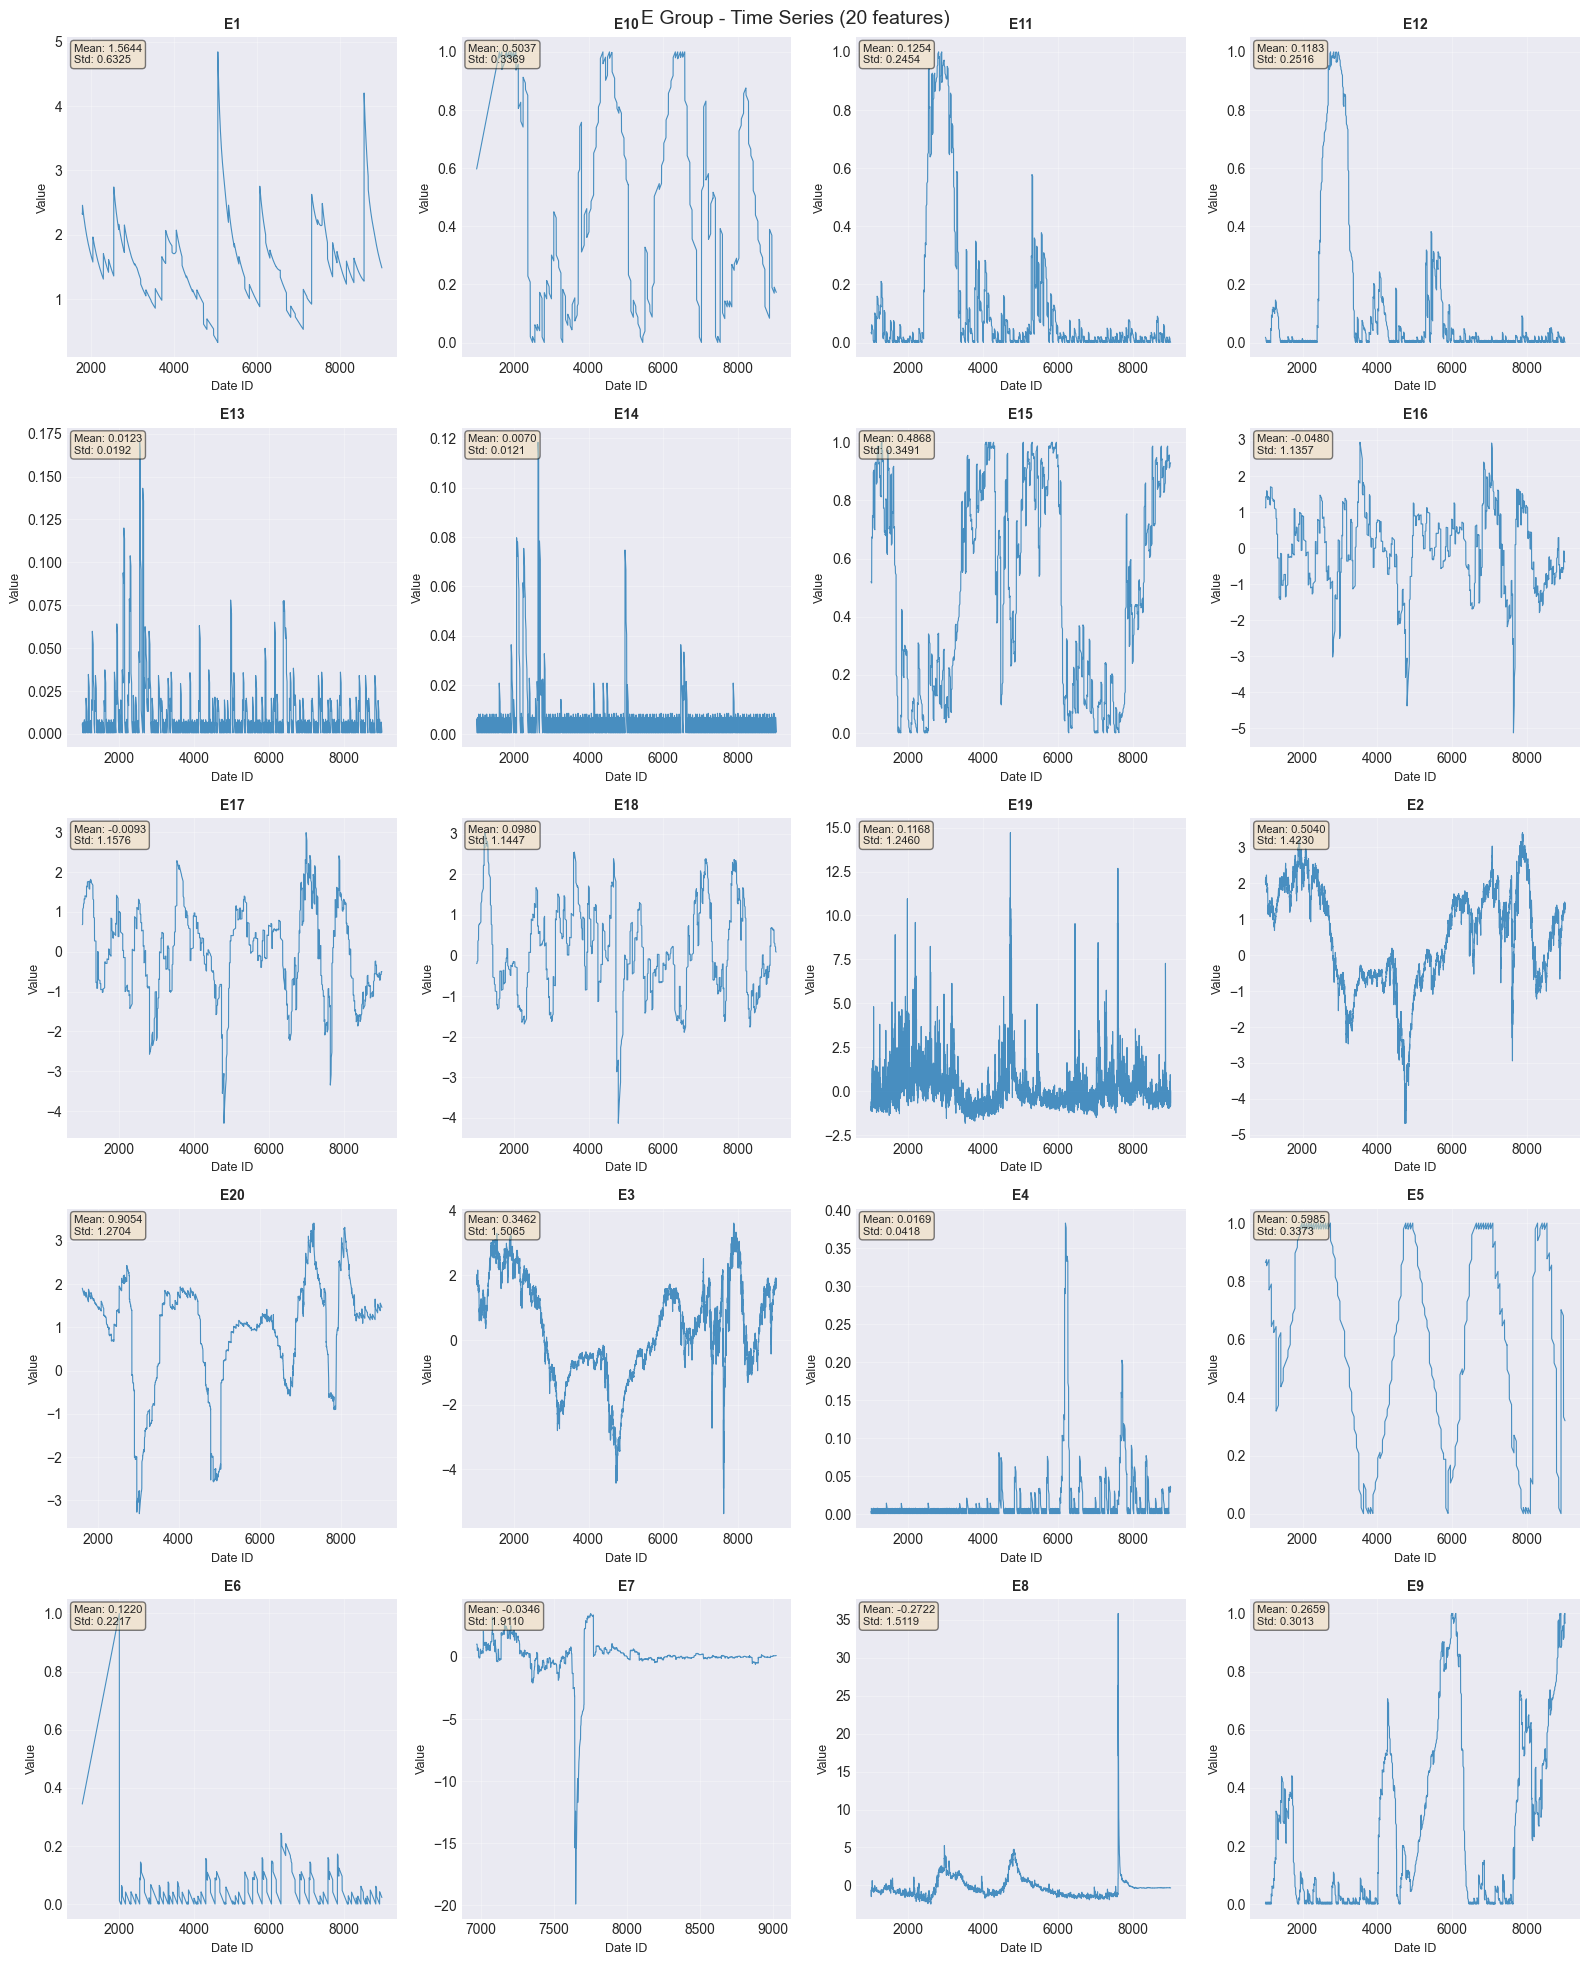

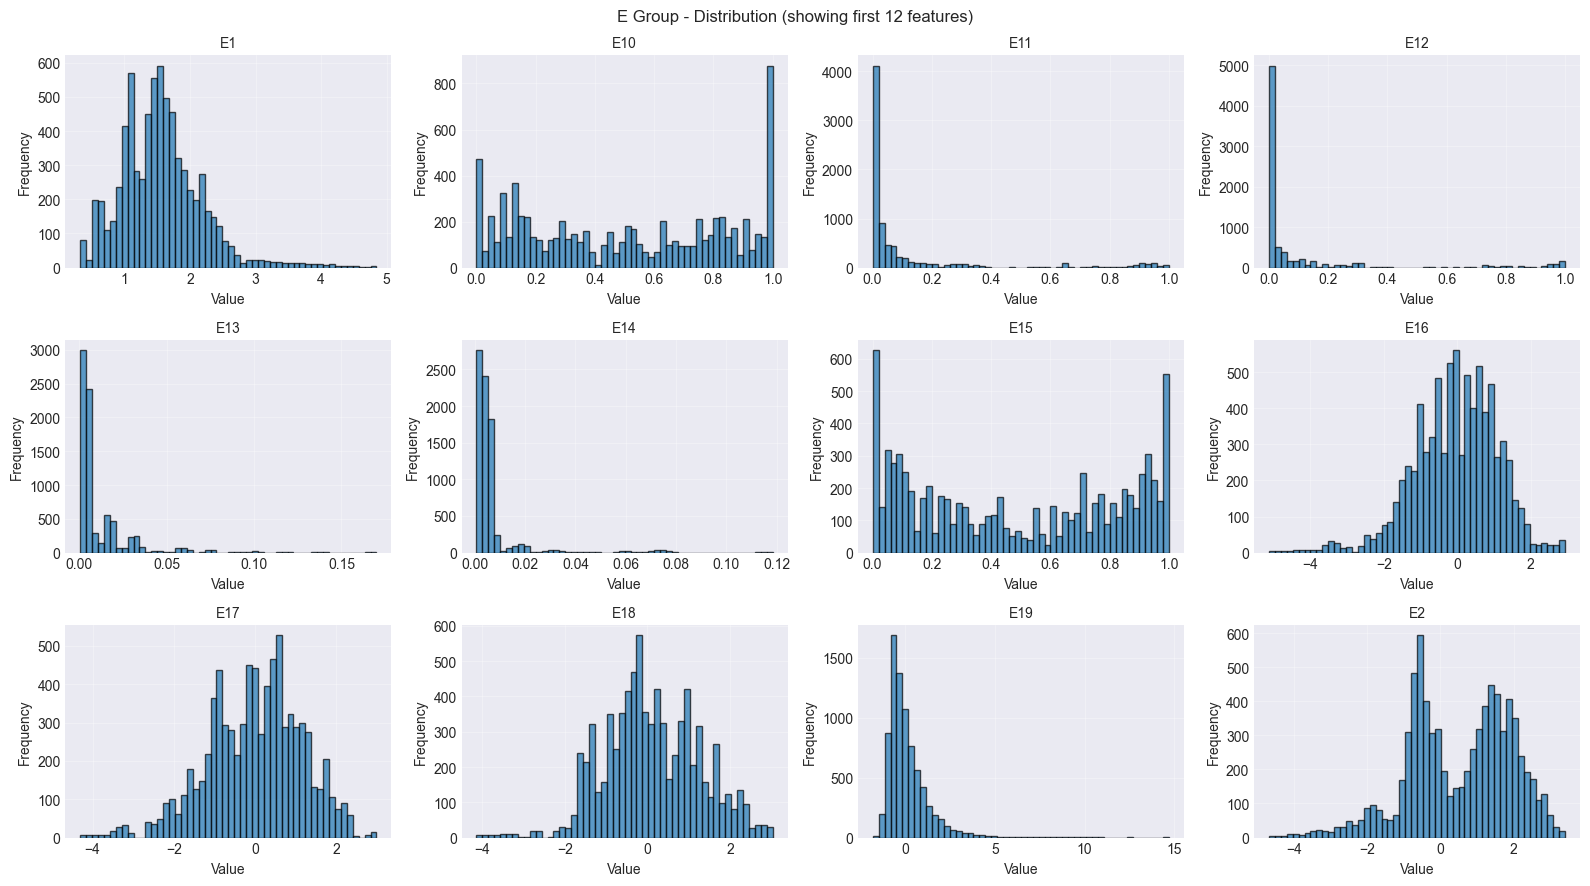


📈 E Group Statistical Summary:


,Feature,Group,Count,Missing,Missing %,Mean,Std,Min,Q25,Median,Q75,Max,Skewness,Kurtosis
0,E1,E,7237,1784,19.7761,1.5644,0.6325,0.3251,1.1158,1.5167,1.8748,4.8439,1.1002,2.7677
1,E10,E,8015,1006,11.1518,0.5037,0.3369,0.0007,0.1663,0.5046,0.8221,1.0000,0.0405,-1.4593
2,E11,E,8015,1006,11.1518,0.1254,0.2454,0.0007,0.0050,0.0195,0.0870,1.0000,2.4658,4.8893
3,E12,E,8015,1006,11.1518,0.1183,0.2516,0.0007,0.0036,0.0069,0.0741,1.0000,2.5457,5.2388
4,E13,E,8015,1006,11.1518,0.0123,0.0192,0.0007,0.0030,0.0053,0.0152,0.1700,3.8758,19.7934
5,E14,E,8015,1006,11.1518,0.0070,0.0121,0.0007,0.0023,0.0043,0.0063,0.1184,5.0269,29.2878
6,E15,E,8015,1006,11.1518,0.4868,0.3491,0.0007,0.1286,0.4421,0.8391,1.0000,0.0481,-1.5455
7,E16,E,8015,1006,11.1518,-0.0480,1.1357,-5.1305,-0.7656,-0.0014,0.7628,2.9367,-0.5575,1.0049
8,E17,E,8015,1006,11.1518,-0.0093,1.1576,-4.3029,-0.8279,0.0611,0.8023,2.9891,-0.3887,0.1688
9,E18,E,8015,1006,11.1518,0.0980,1.1447,-4.1311,-0.6583,0.0084,0.9088,3.0241,0.0042,0.0257


In [5]:
# E Group analysis (Economic indicators)
e_features = loader.feature_groups.get('E', [])
print(f"📊 Analyzing E Group ({len(e_features)} features)\n")

# Time series (date_id vs value)
plot_feature_timeseries(train_df, e_features, 'E')

# Distribution (first 12 features)
plot_distribution_comparison(train_df, e_features, 'E')

# Statistics table
e_stats = get_feature_statistics(train_df, e_features, 'E')
print('\n📈 E Group Statistical Summary:')
print('='*80)
display(e_stats)

📊 Analyzing V Group (13 features)



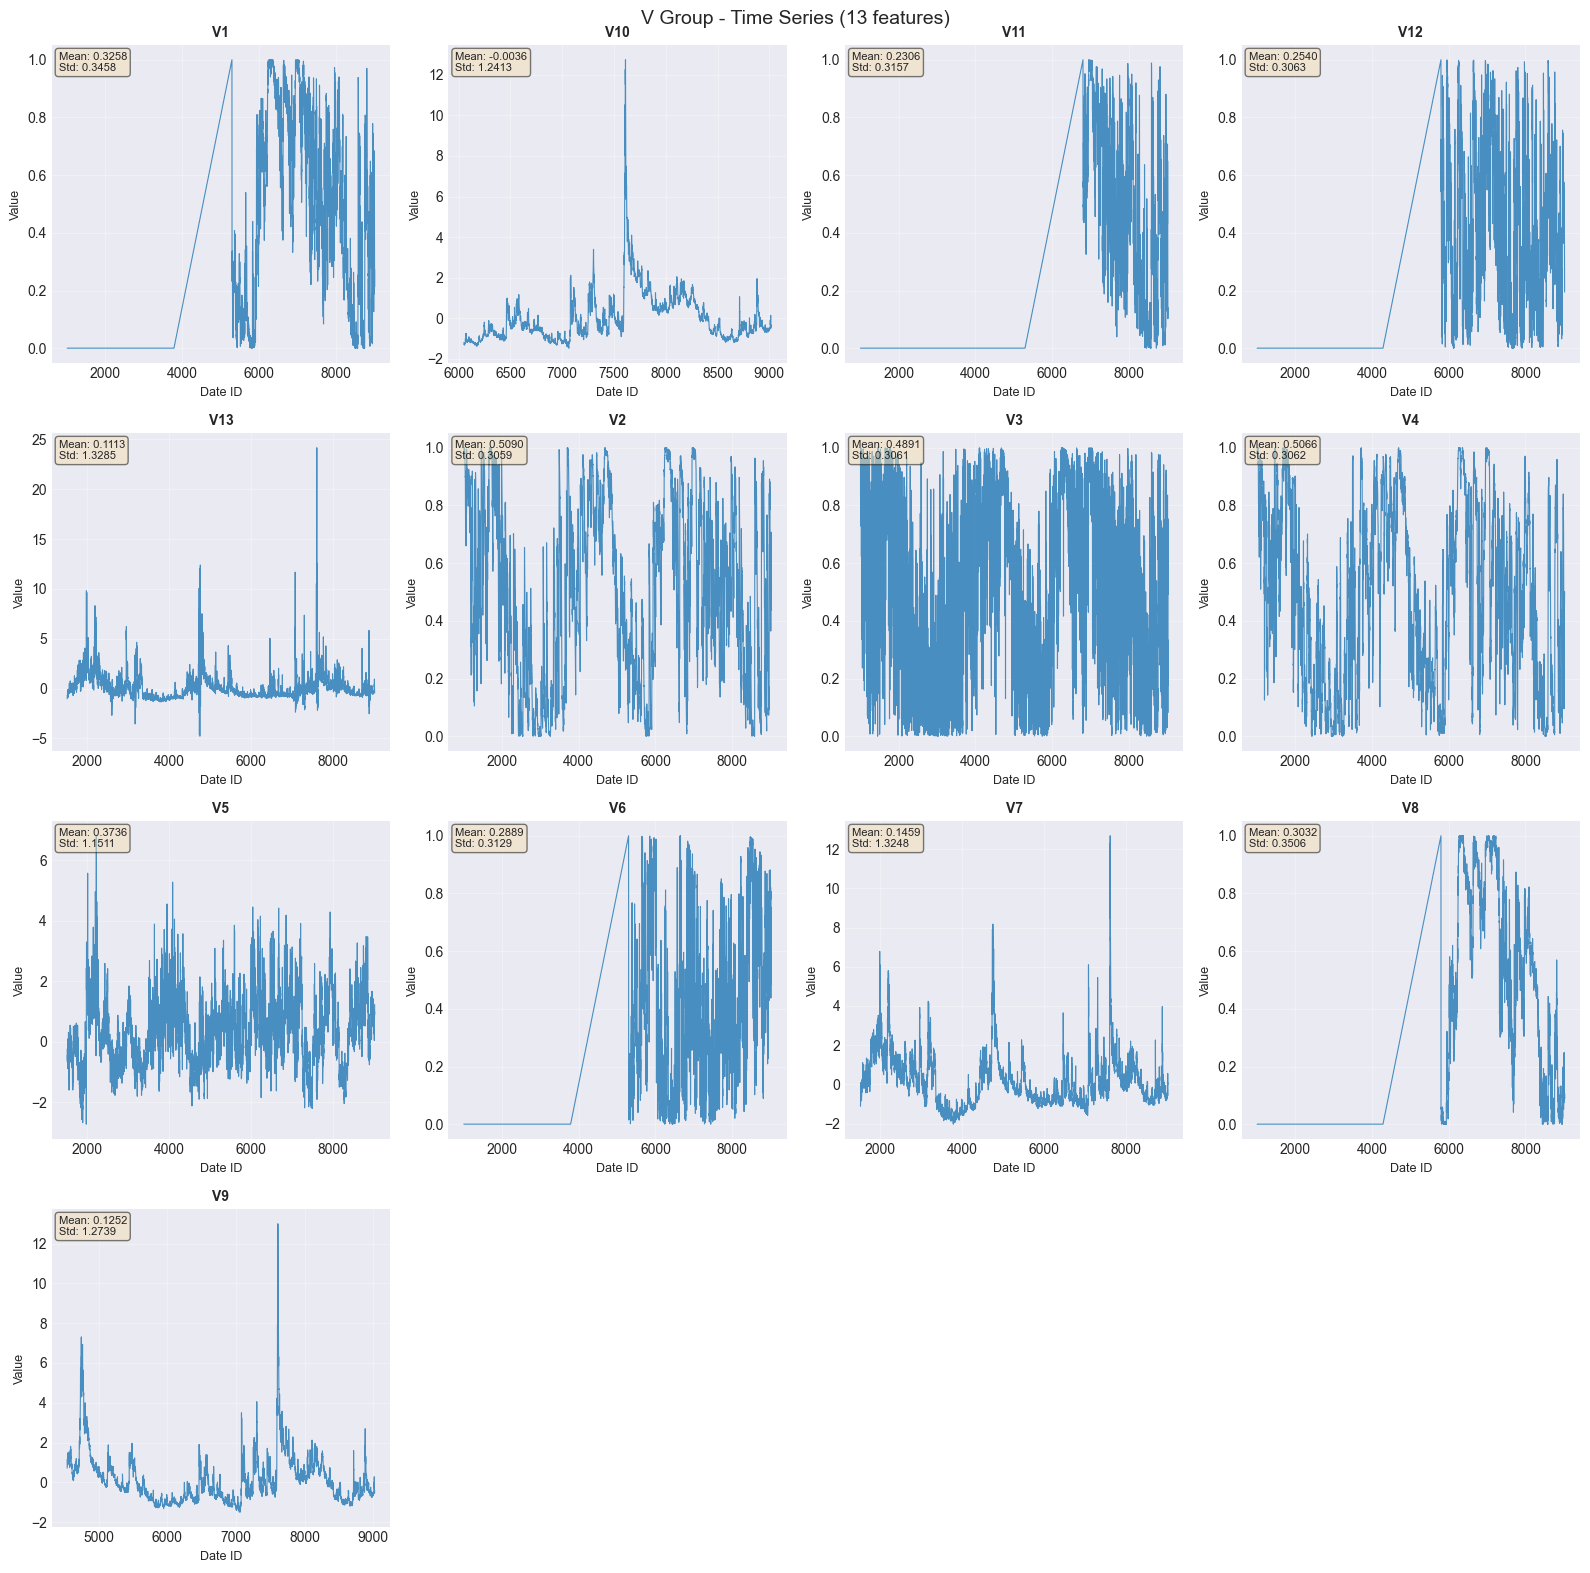

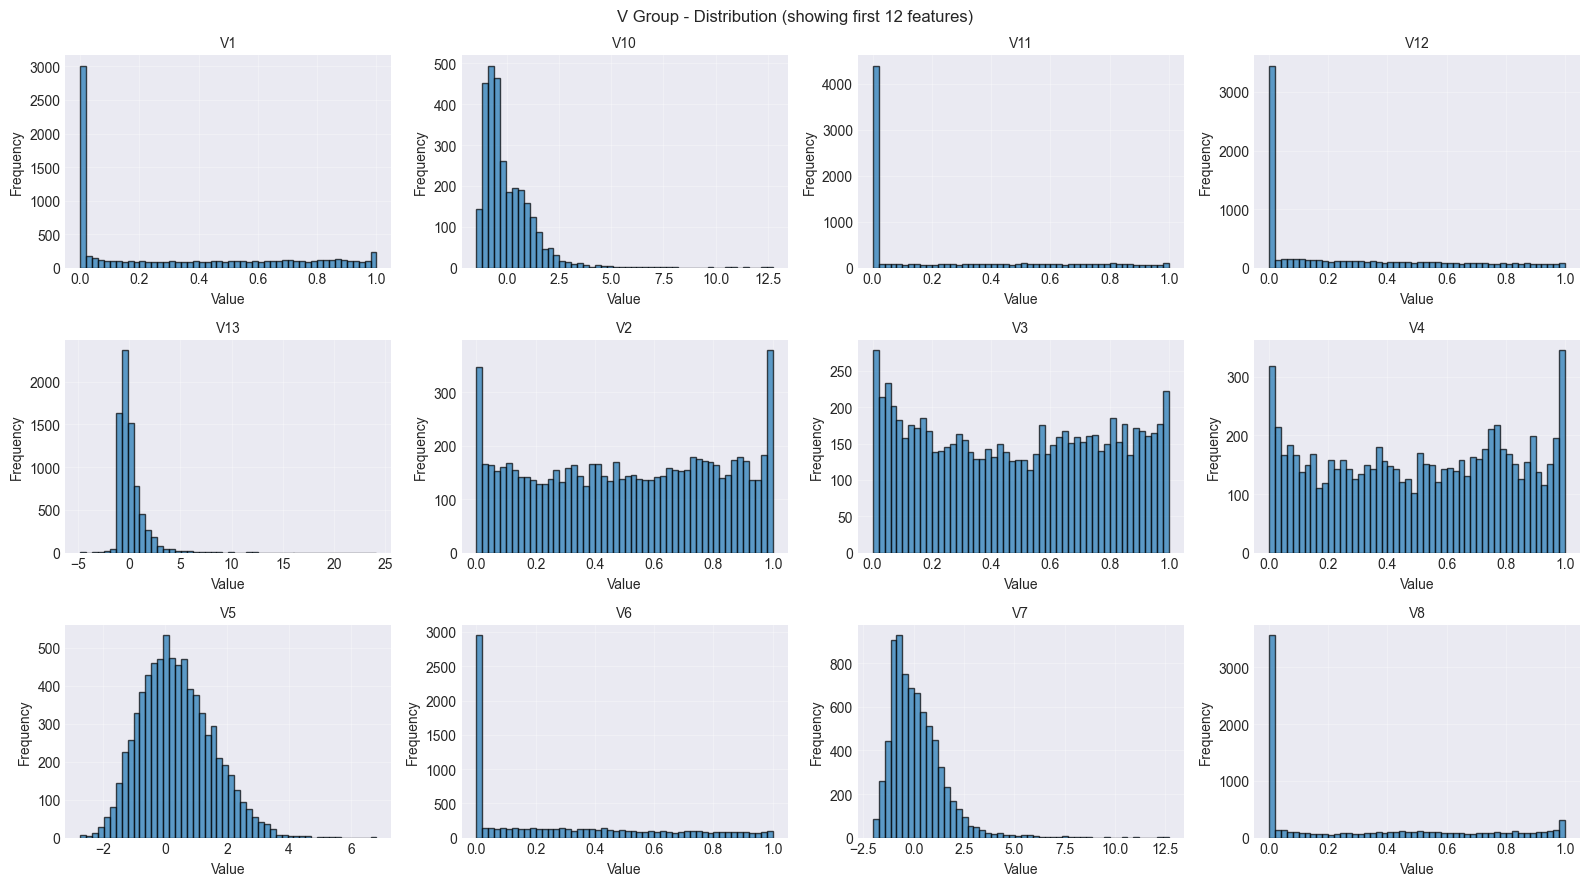


📈 V Group Statistical Summary:


,Feature,Group,Count,Missing,Missing %,Mean,Std,Min,Q25,Median,Q75,Max,Skewness,Kurtosis
0,V1,V,8015,1006,11.1518,0.3258,0.3458,0.0007,0.0007,0.1978,0.6379,1.0000,0.5709,-1.1911
1,V10,V,2972,6049,67.0547,-0.0036,1.2413,-1.4735,-0.8169,-0.3897,0.5481,12.7422,2.9922,17.9311
2,V11,V,8015,1006,11.1518,0.2306,0.3157,0.0007,0.0007,0.0007,0.4610,1.0000,1.0426,-0.3919
3,V12,V,8015,1006,11.1518,0.2540,0.3063,0.0007,0.0007,0.0999,0.4755,1.0000,0.9263,-0.4987
4,V13,V,7510,1511,16.7498,0.1113,1.3285,-4.7703,-0.6874,-0.2248,0.4736,24.1515,4.0069,36.5682
5,V2,V,8015,1006,11.1518,0.5090,0.3059,0.0007,0.2427,0.5132,0.7765,1.0000,-0.0497,-1.2500
6,V3,V,8015,1006,11.1518,0.4891,0.3061,0.0007,0.2067,0.4914,0.7599,1.0000,0.0165,-1.3049
7,V4,V,8015,1006,11.1518,0.5066,0.3062,0.0007,0.2368,0.5179,0.7712,1.0000,-0.0548,-1.2648
8,V5,V,7509,1512,16.7609,0.3736,1.1511,-2.7235,-0.4701,0.2800,1.1193,6.8099,0.4263,0.1177
9,V6,V,8015,1006,11.1518,0.2889,0.3129,0.0007,0.0007,0.1825,0.5198,1.0000,0.7462,-0.7841


In [6]:
# V Group analysis (Volatility indicators)
v_features = loader.feature_groups.get('V', [])
print(f"📊 Analyzing V Group ({len(v_features)} features)\n")

plot_feature_timeseries(train_df, v_features, 'V')
plot_distribution_comparison(train_df, v_features, 'V')

v_stats = get_feature_statistics(train_df, v_features, 'V')
print('\n📈 V Group Statistical Summary:')
print('='*80)
display(v_stats)

📊 Analyzing M Group (18 features)



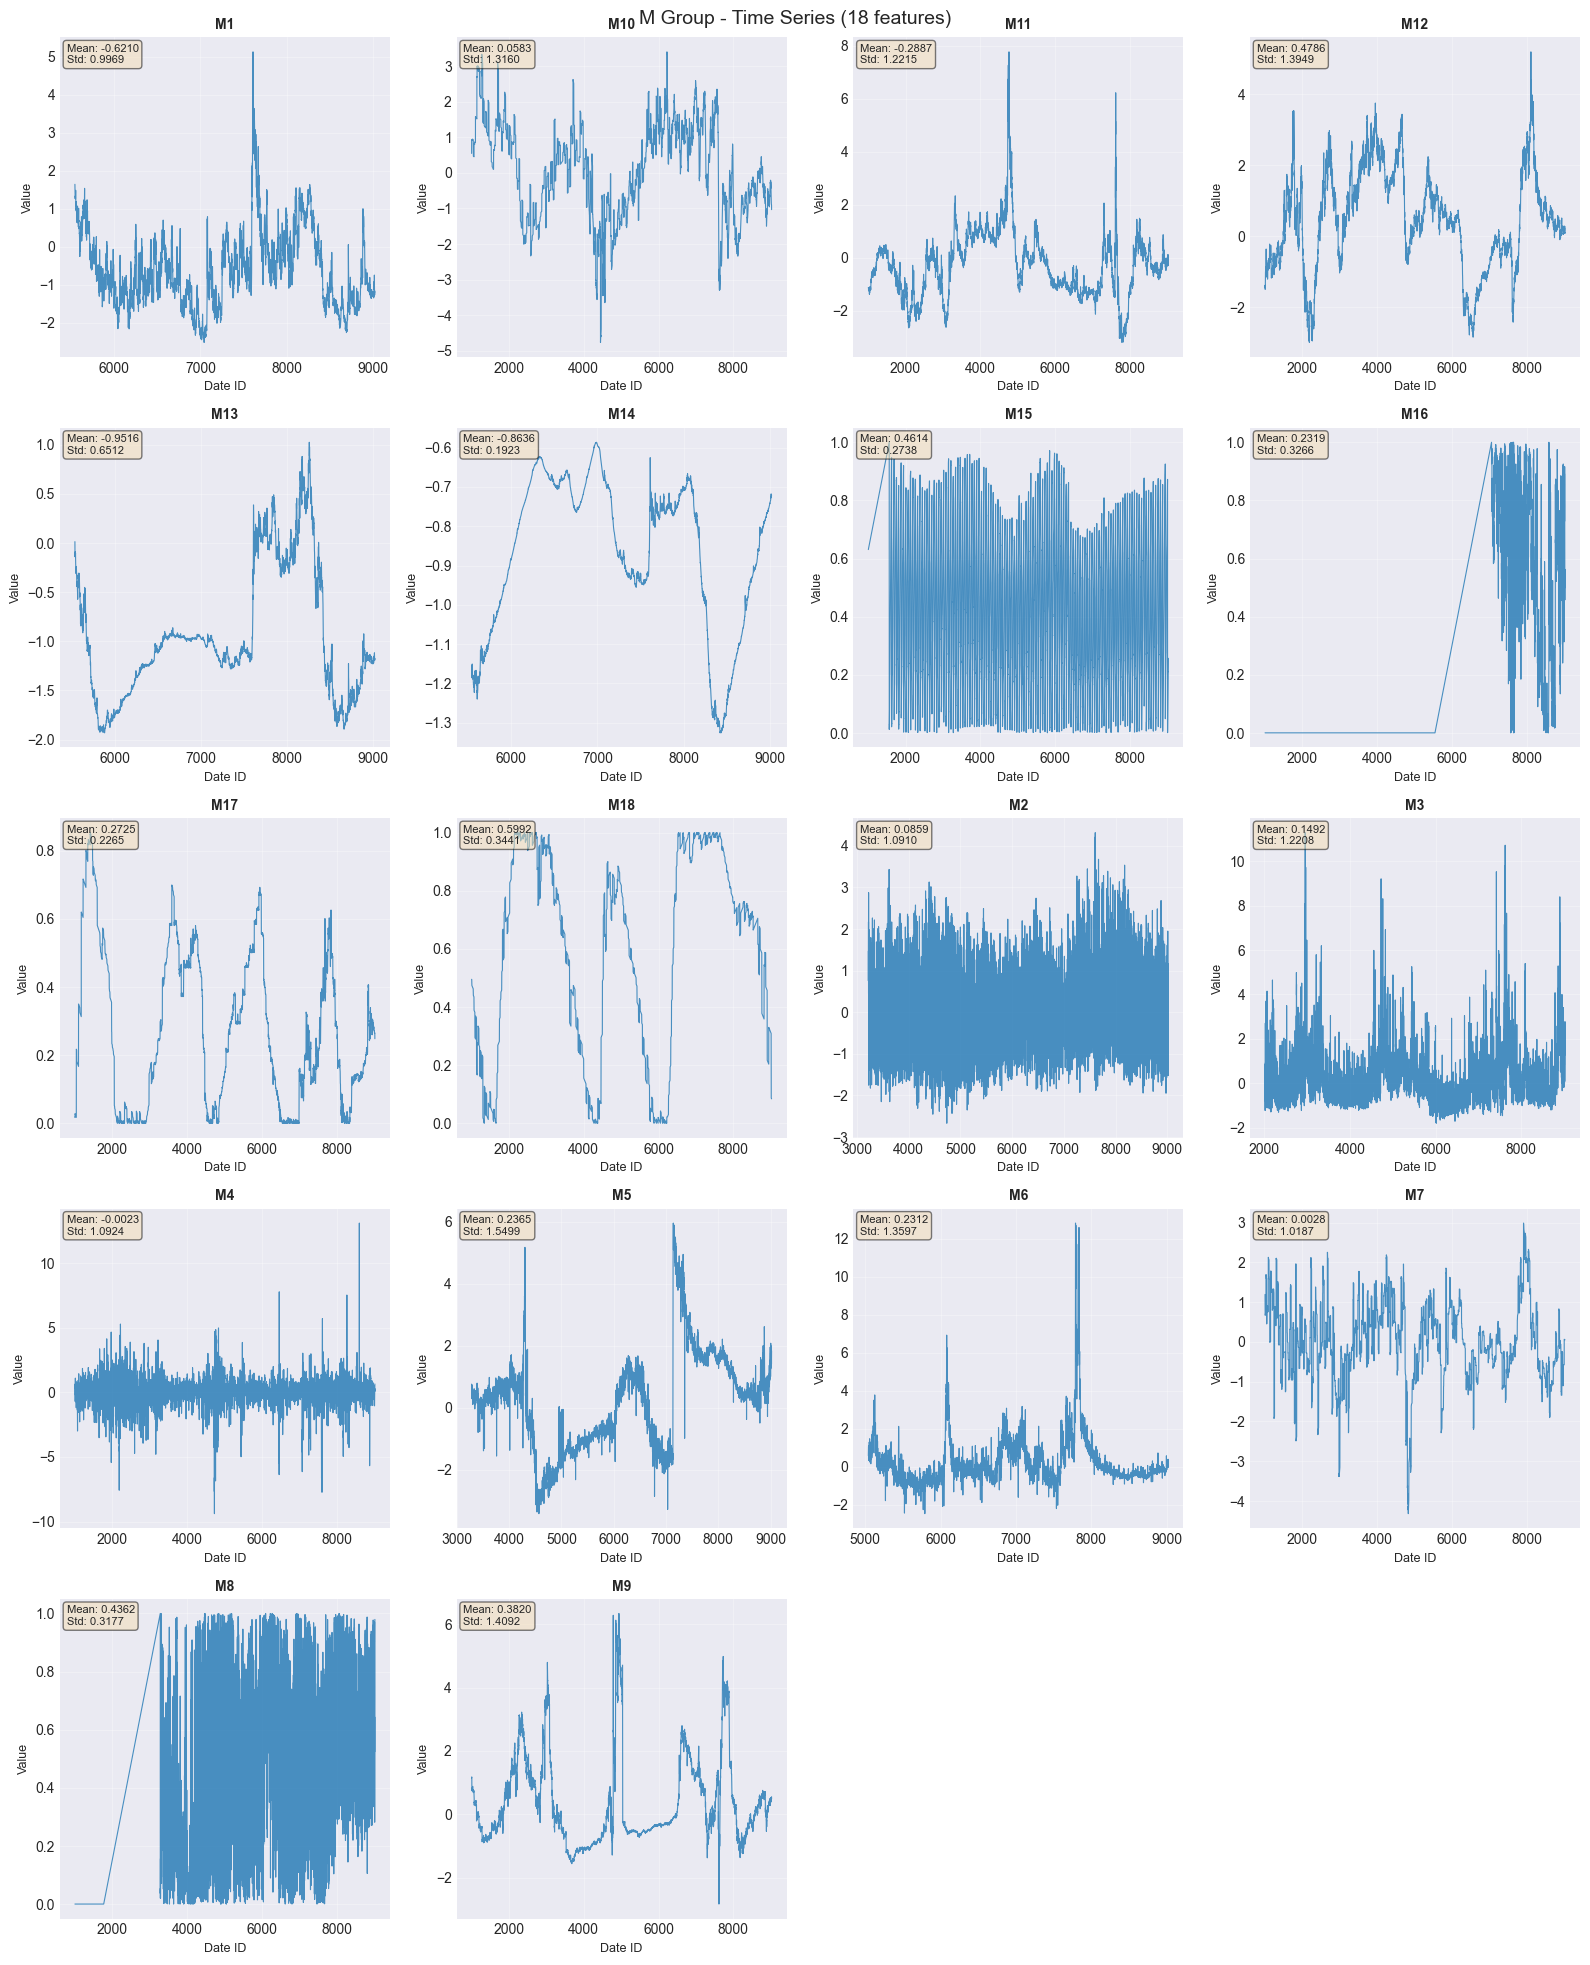

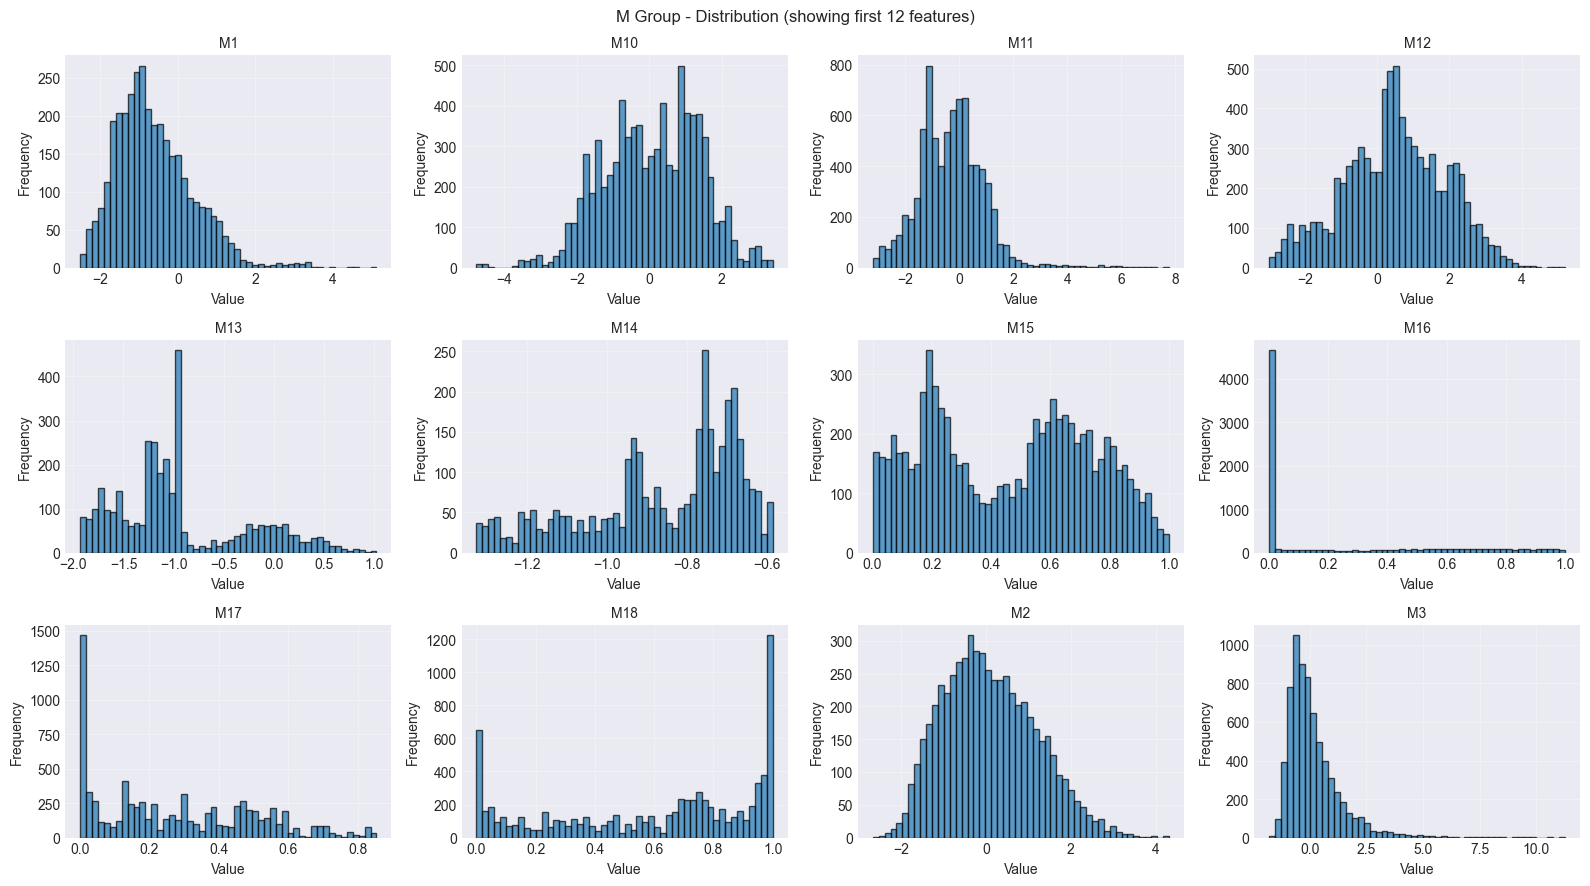


📈 M Group Statistical Summary:


,Feature,Group,Count,Missing,Missing %,Mean,Std,Min,Q25,Median,Q75,Max,Skewness,Kurtosis
0,M1,M,3474,5547,61.4899,-0.6210,0.9969,-2.5229,-1.3345,-0.8050,-0.0447,5.1259,0.9600,1.6530
1,M10,M,8015,1006,11.1518,0.0583,1.3160,-4.7658,-0.8651,0.1298,1.0867,3.4012,-0.1940,-0.3127
2,M11,M,8015,1006,11.1518,-0.2887,1.2215,-3.1902,-1.1205,-0.2904,0.3927,7.7607,0.9598,3.7517
3,M12,M,8015,1006,11.1518,0.4786,1.3949,-2.9934,-0.4689,0.4889,1.4716,5.2021,-0.1090,-0.3757
4,M13,M,3481,5540,61.4123,-0.9516,0.6512,-1.9321,-1.3946,-1.0890,-0.5821,1.0263,0.7857,-0.2069
5,M14,M,3481,5540,61.4123,-0.8636,0.1923,-1.3259,-0.9767,-0.7965,-0.7048,-0.5862,-0.7333,-0.5199
6,M15,M,8015,1006,11.1518,0.4614,0.2738,0.0007,0.2060,0.4934,0.6895,1.0000,0.0162,-1.2781
7,M16,M,8015,1006,11.1518,0.2319,0.3266,0.0007,0.0007,0.0007,0.4937,1.0000,1.0278,-0.5145
8,M17,M,8015,1006,11.1518,0.2725,0.2265,0.0007,0.0483,0.2229,0.4633,0.8532,0.4906,-0.8147
9,M18,M,8015,1006,11.1518,0.5992,0.3441,0.0007,0.2948,0.7014,0.9320,1.0000,-0.4724,-1.2037


In [7]:
# M Group analysis (Market indicators)
m_features = loader.feature_groups.get('M', [])
print(f"📊 Analyzing M Group ({len(m_features)} features)\n")

plot_feature_timeseries(train_df, m_features, 'M')
plot_distribution_comparison(train_df, m_features, 'M')

m_stats = get_feature_statistics(train_df, m_features, 'M')
print('\n📈 M Group Statistical Summary:')
print('='*80)
display(m_stats)


📊 Analyzing P Group (13 features)



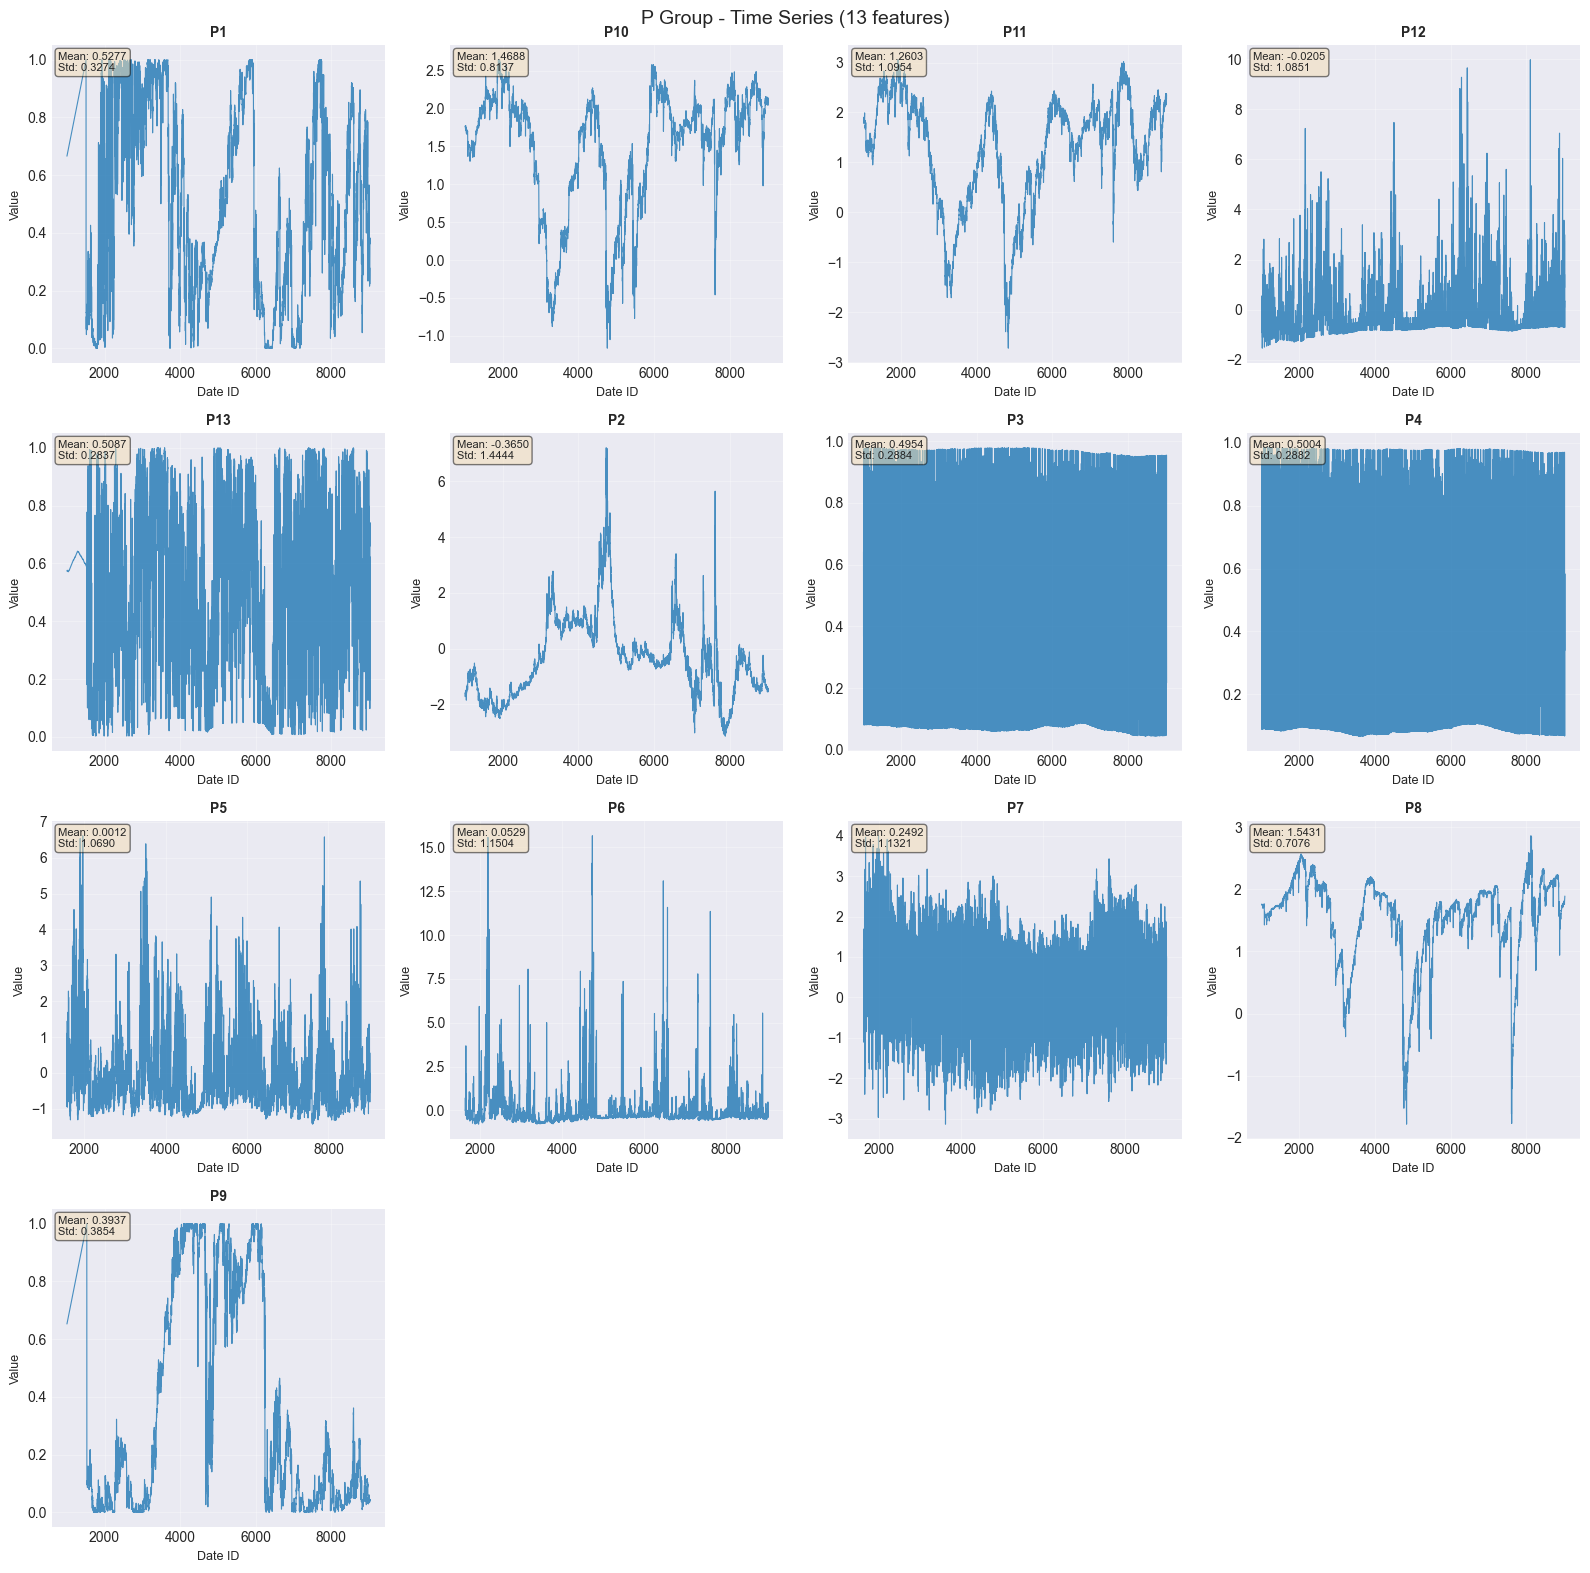

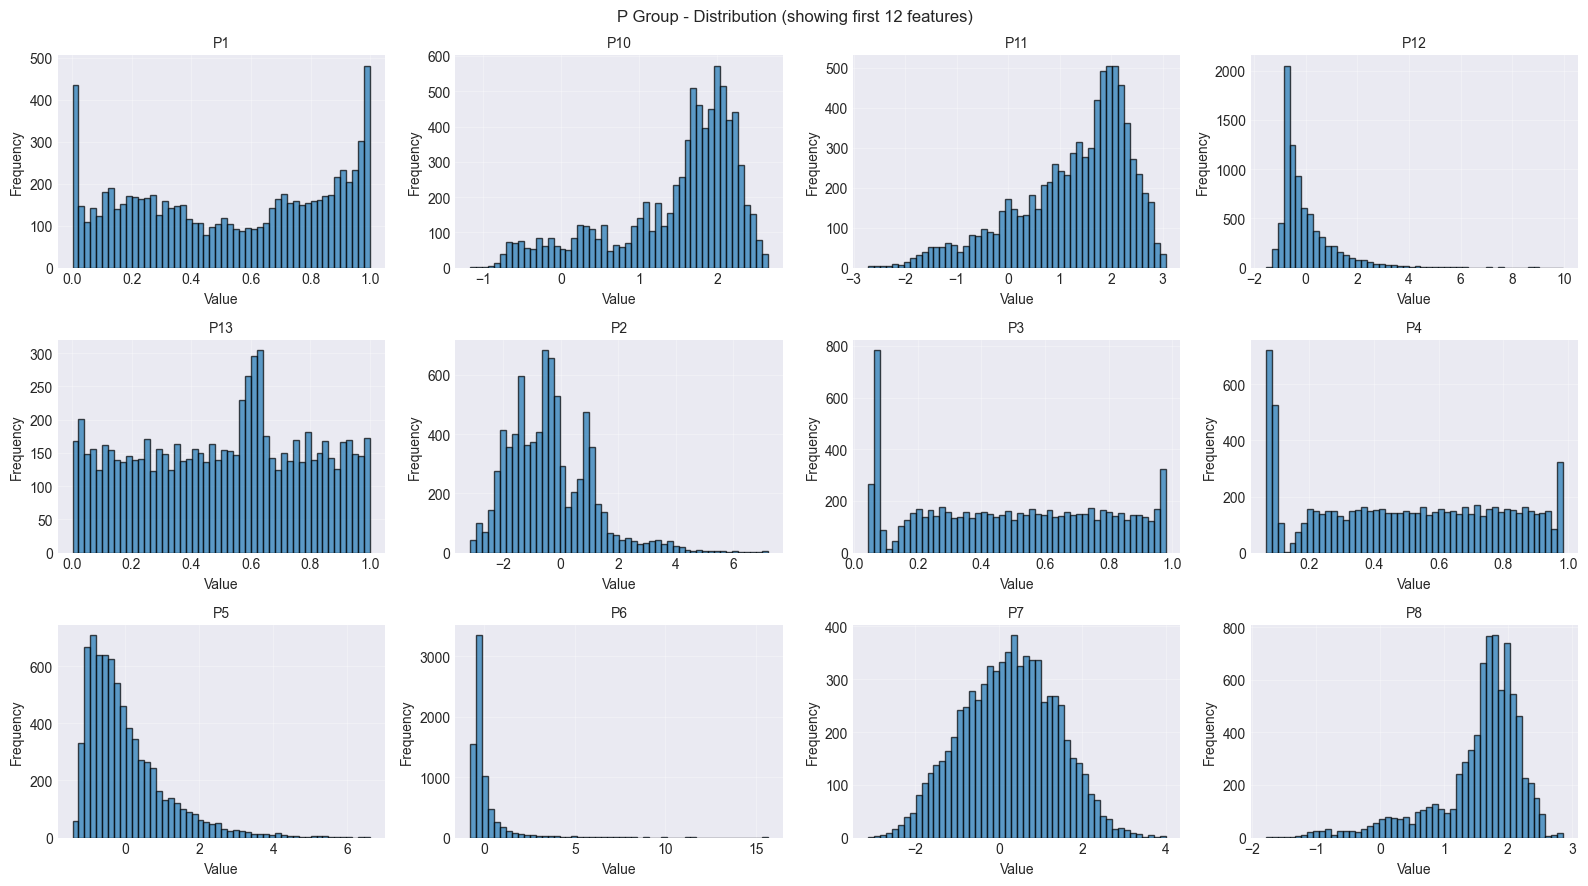


📈 P Group Statistical Summary:


,Feature,Group,Count,Missing,Missing %,Mean,Std,Min,Q25,Median,Q75,Max,Skewness,Kurtosis
0,P1,P,8015,1006,11.1518,0.5277,0.3274,0.0007,0.2262,0.5390,0.8413,1.0000,-0.0865,-1.4162
1,P10,P,8015,1006,11.1518,1.4688,0.8137,-1.1628,1.0896,1.7288,2.0538,2.6442,-1.1071,0.3013
2,P11,P,8015,1006,11.1518,1.2603,1.0954,-2.7190,0.6437,1.5497,2.0800,3.0562,-0.9206,0.2808
3,P12,P,8015,1006,11.1518,-0.0205,1.0851,-1.5393,-0.7150,-0.3804,0.2881,9.9756,2.6368,11.2067
4,P13,P,8015,1006,11.1518,0.5087,0.2837,0.0023,0.2652,0.5384,0.7419,1.0000,-0.0848,-1.1138
5,P2,P,8015,1006,11.1518,-0.3650,1.4444,-3.1409,-1.4179,-0.5207,0.5438,7.2110,1.0161,1.8216
6,P3,P,8015,1006,11.1518,0.4954,0.2884,0.0440,0.2442,0.4947,0.7434,0.9785,0.0206,-1.2324
7,P4,P,8015,1006,11.1518,0.5004,0.2882,0.0661,0.2490,0.5026,0.7513,0.9848,0.0058,-1.2490
8,P5,P,7447,1574,17.4482,0.0012,1.0690,-1.4301,-0.7603,-0.2869,0.4441,6.6143,1.7105,3.9822
9,P6,P,7383,1638,18.1576,0.0529,1.1504,-0.7801,-0.4317,-0.2931,0.0432,15.6693,5.3096,41.6136



📊 Analyzing S Group (12 features)



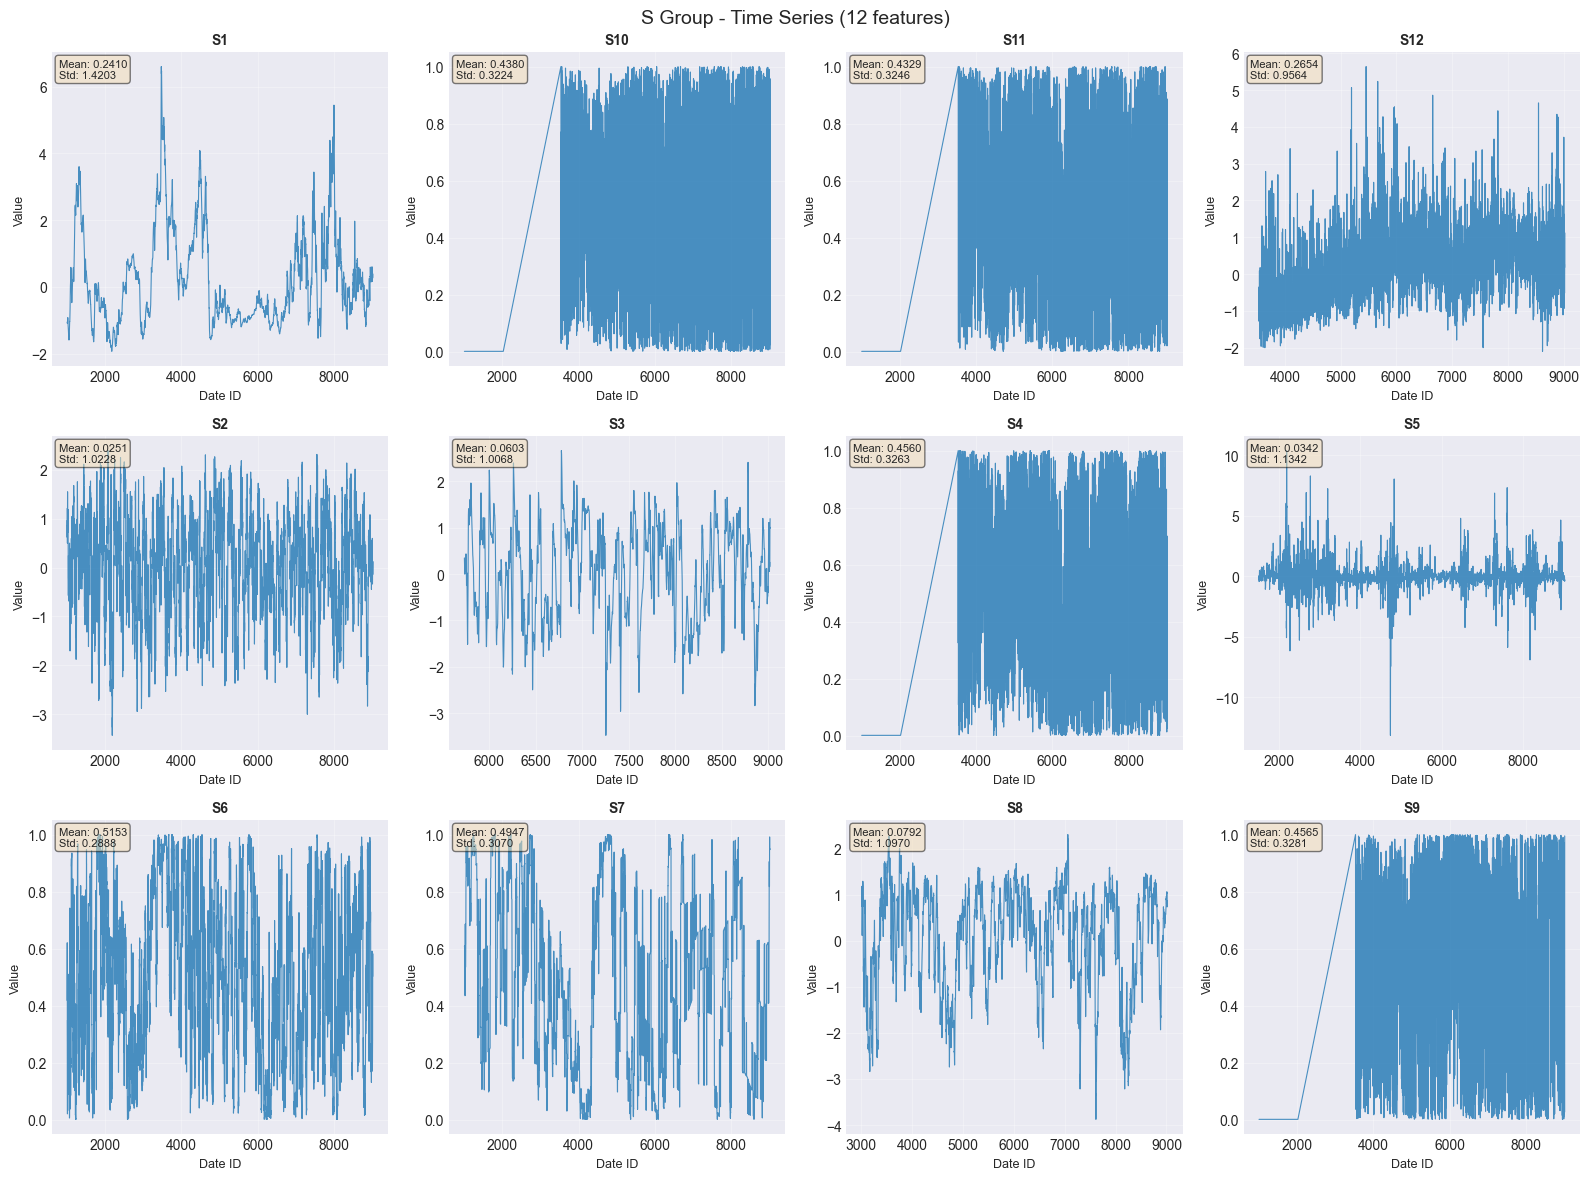

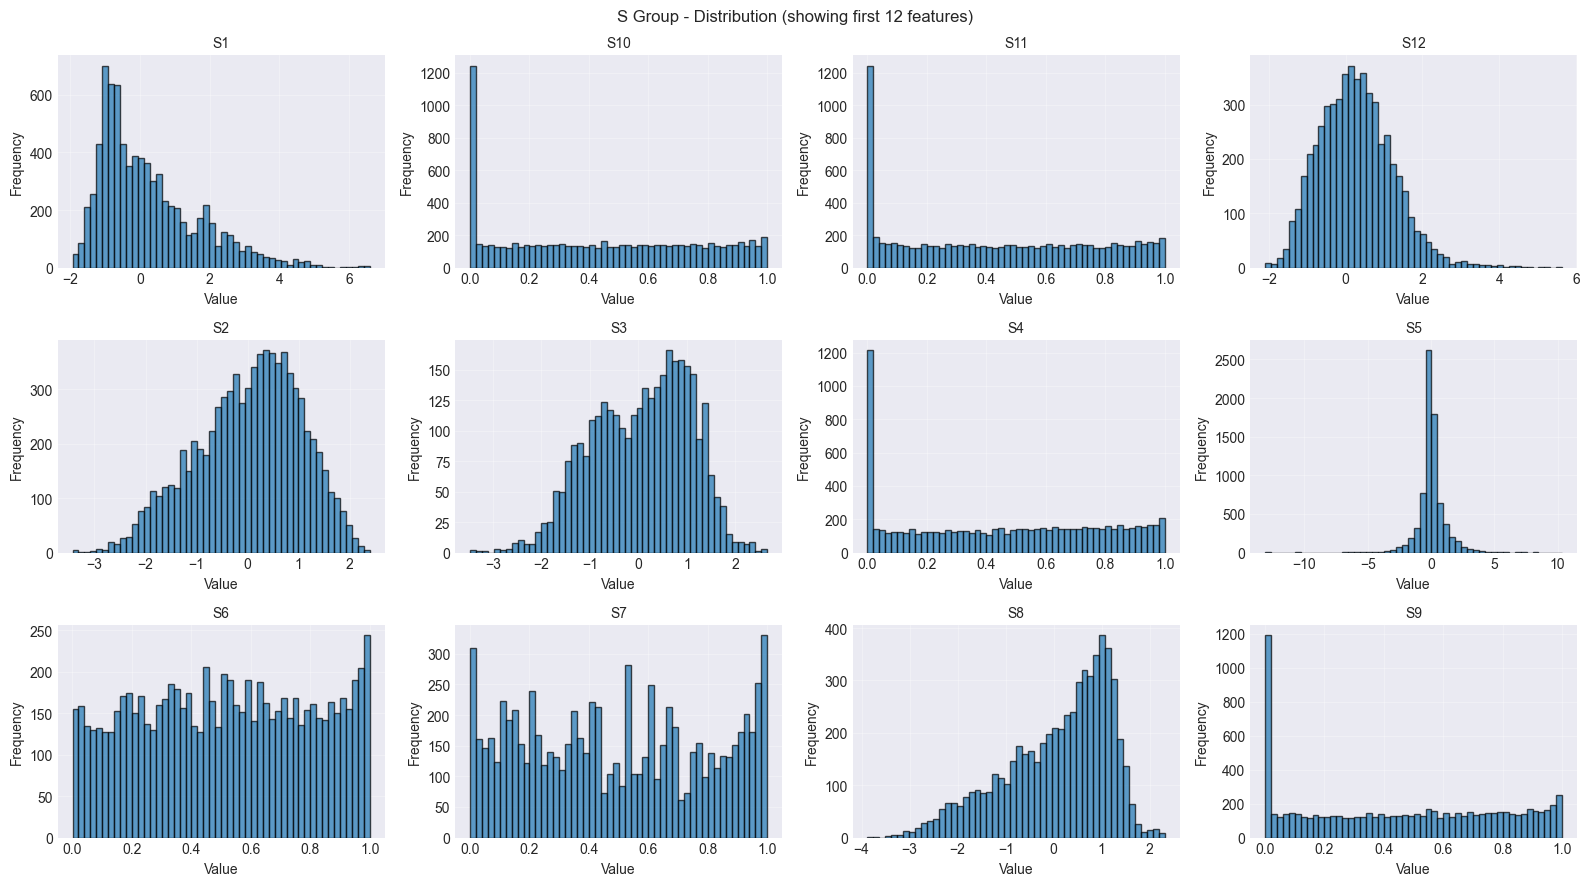


📈 S Group Statistical Summary:


,Feature,Group,Count,Missing,Missing %,Mean,Std,Min,Q25,Median,Q75,Max,Skewness,Kurtosis
0,S1,S,8015,1006,11.1518,0.2410,1.4203,-1.9354,-0.8341,-0.1286,0.9813,6.6004,1.1431,1.0934
1,S10,S,8015,1006,11.1518,0.4380,0.3224,0.0007,0.1343,0.4279,0.7209,1.0000,0.1146,-1.3073
2,S11,S,8015,1006,11.1518,0.4329,0.3246,0.0007,0.1184,0.4180,0.7196,1.0000,0.1402,-1.3200
3,S12,S,5484,3537,39.2085,0.2654,0.9564,-2.1035,-0.4311,0.2078,0.8517,5.6429,0.6010,1.0258
4,S2,S,8015,1006,11.1518,0.0251,1.0228,-3.4298,-0.6570,0.1318,0.7815,2.3920,-0.3576,-0.4110
5,S3,S,3288,5733,63.5517,0.0603,1.0068,-3.4722,-0.7126,0.1707,0.8590,2.6566,-0.2910,-0.5541
6,S4,S,8015,1006,11.1518,0.4560,0.3263,0.0007,0.1442,0.4616,0.7464,1.0000,0.0259,-1.3412
7,S5,S,7510,1511,16.7498,0.0342,1.1342,-13.1246,-0.3431,-0.0311,0.3616,10.3708,-0.2012,14.3977
8,S6,S,8015,1006,11.1518,0.5153,0.2888,0.0007,0.2731,0.5185,0.7616,1.0000,-0.0214,-1.1609
9,S7,S,8015,1006,11.1518,0.4947,0.3070,0.0007,0.2161,0.4848,0.7697,1.0000,0.0730,-1.2546



📊 Analyzing D Group (9 features)



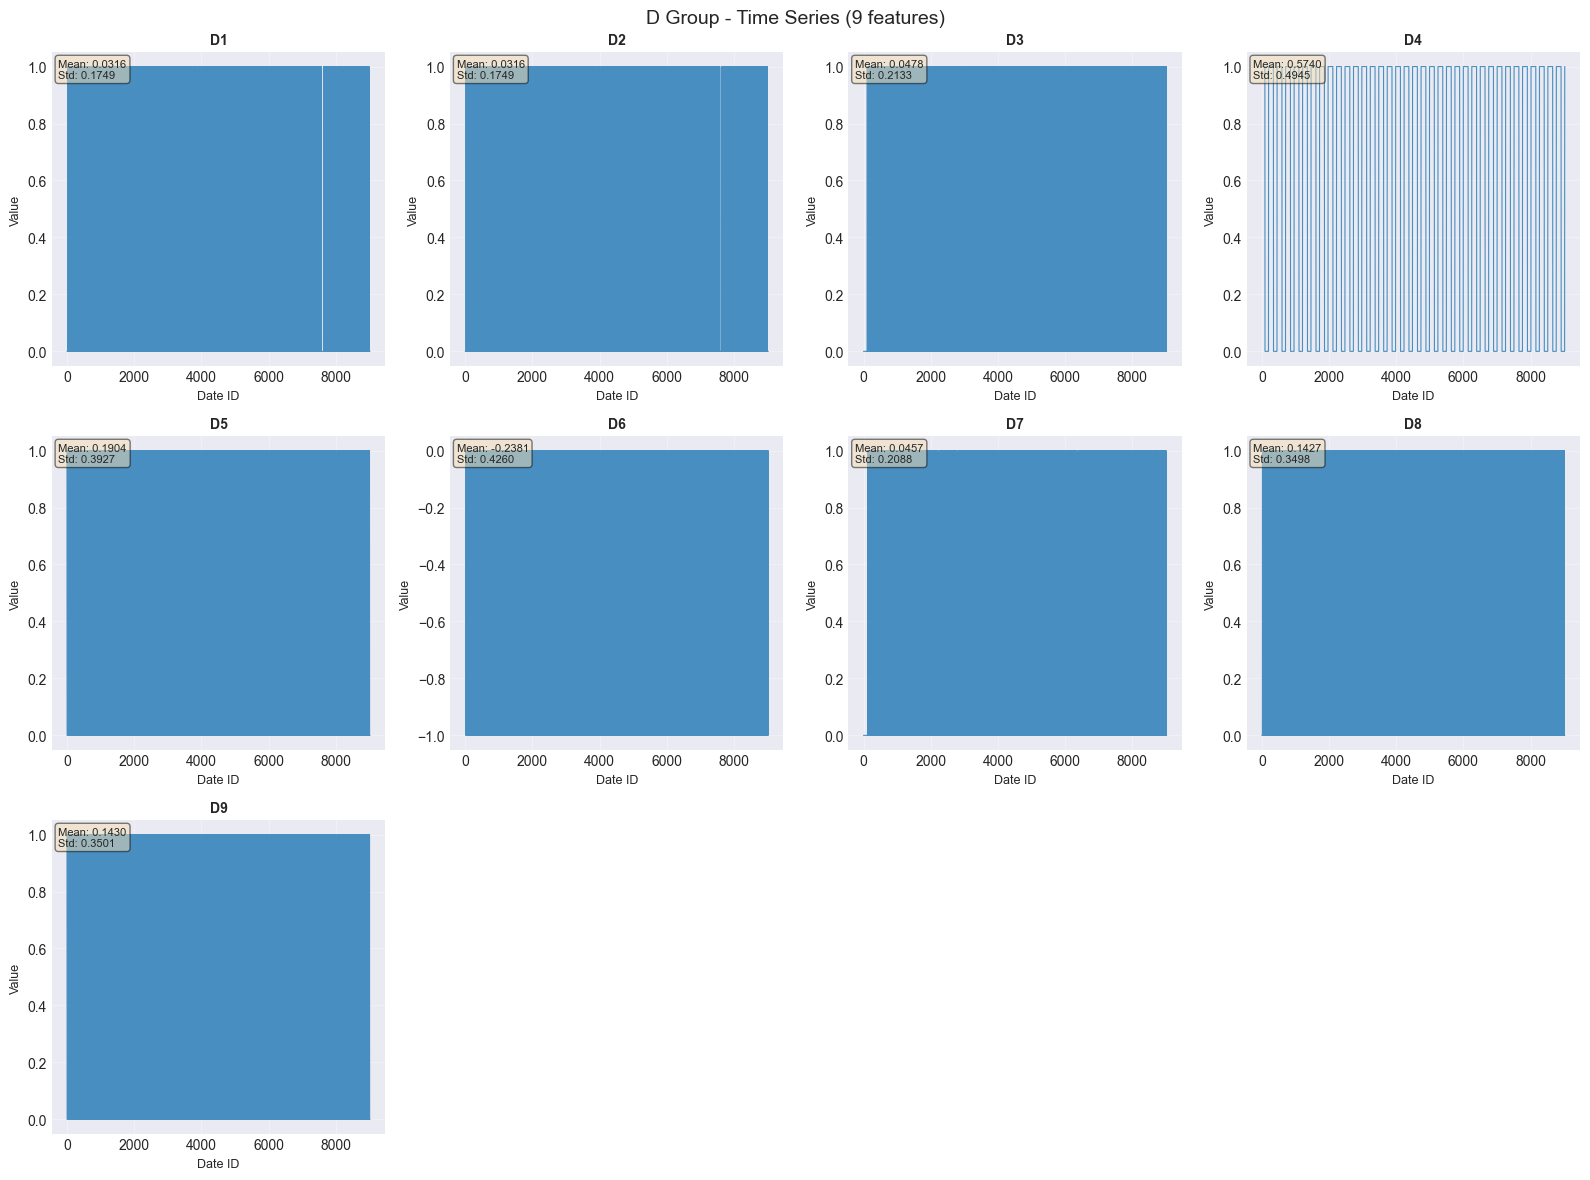

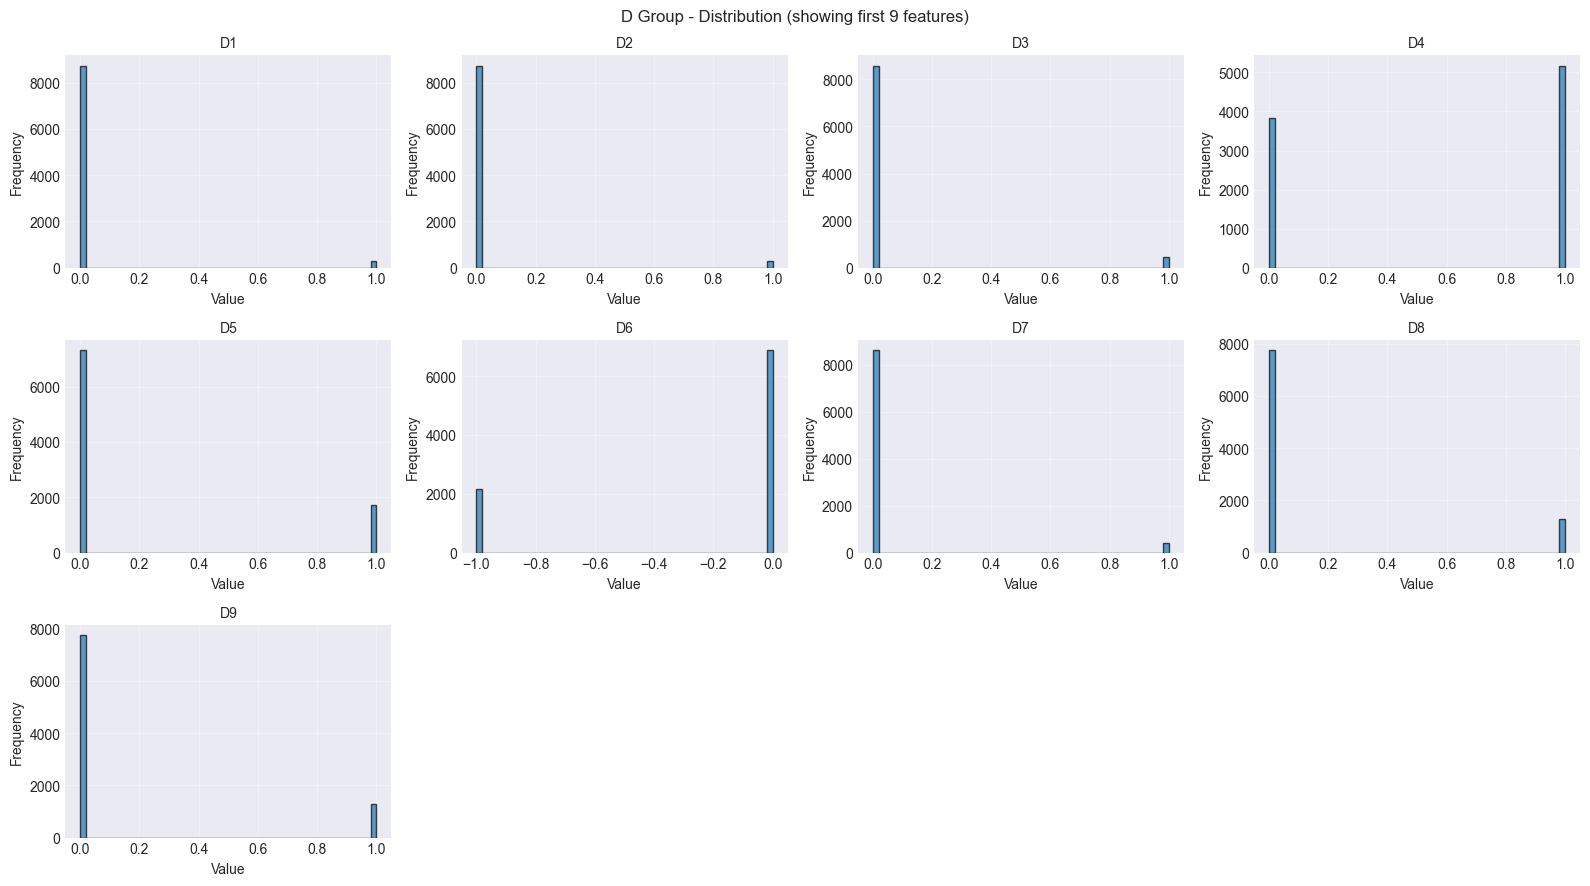


📈 D Group Statistical Summary:


,Feature,Group,Count,Missing,Missing %,Mean,Std,Min,Q25,Median,Q75,Max,Skewness,Kurtosis
0,D1,D,9021,0,0.0000,0.0316,0.1749,0.0000,0.0000,0.0000,0.0000,1.0000,5.3559,26.6853
1,D2,D,9021,0,0.0000,0.0316,0.1749,0.0000,0.0000,0.0000,0.0000,1.0000,5.3559,26.6853
2,D3,D,9021,0,0.0000,0.0478,0.2133,0.0000,0.0000,0.0000,0.0000,1.0000,4.2404,15.9806
3,D4,D,9021,0,0.0000,0.5740,0.4945,0.0000,0.0000,1.0000,1.0000,1.0000,-0.2993,-1.9104
4,D5,D,9021,0,0.0000,0.1904,0.3927,0.0000,0.0000,0.0000,0.0000,1.0000,1.5767,0.4861
5,D6,D,9021,0,0.0000,-0.2381,0.4260,-1.0000,0.0000,0.0000,0.0000,0.0000,-1.2297,-0.4878
6,D7,D,9021,0,0.0000,0.0457,0.2088,0.0000,0.0000,0.0000,0.0000,1.0000,4.3524,16.9435
7,D8,D,9021,0,0.0000,0.1427,0.3498,0.0000,0.0000,0.0000,0.0000,1.0000,2.0435,2.1757
8,D9,D,9021,0,0.0000,0.1430,0.3501,0.0000,0.0000,0.0000,0.0000,1.0000,2.0396,2.1599



✅ Aggregation complete — saved CSVs to:
 - /Users/gimjunseog/projects/kaggle/Prediction_Market/results/feature_analysis/all_feature_stats.csv
 - /Users/gimjunseog/projects/kaggle/Prediction_Market/results/feature_analysis/group_summary.csv
 - /Users/gimjunseog/projects/kaggle/Prediction_Market/results/feature_analysis/missing_by_feature.csv


,Group,features,missing_total,mean_of_means,mean_of_std,mean_of_cv,mean_of_skew,mean_of_kurtosis
0,E,20,27471,0.2714,0.7528,12.7221,1.2737,12.2626
1,M,18,41254,0.0499,0.8891,51.2107,0.5772,2.4360
2,V,13,23170,0.2815,0.6822,29.6032,1.2259,5.2983



Top 20 features by missing values:


,Group,Missing
17,E,6969
1,V,6049
0,M,5547
4,M,5540
5,M,5540
14,M,5043
12,V,4539
13,M,3283
10,M,3217
11,M,2018



All done. Run the notebook cells (or this final cell) in order to generate plots and exports.


In [10]:
# P, S, D group analyses + cross-group aggregation, CV/missing analysis, and exports
import os
from IPython.display import display

results_dir = os.path.join(os.getcwd(), 'results', 'feature_analysis')
os.makedirs(results_dir, exist_ok=True)

group_vars = {}
for grp in ['P', 'S', 'D']:
    feats = loader.feature_groups.get(grp, [])
    print(f"\n📊 Analyzing {grp} Group ({len(feats)} features)\n")
    if len(feats) == 0:
        print(f" - No features found for group {grp}, skipping.")
        continue

    # Time-series and distribution plots
    try:
        plot_feature_timeseries(train_df, feats, grp)
        plot_distribution_comparison(train_df, feats, grp)
    except Exception as e:
        print(f"Warning: plotting for group {grp} failed: {e}")

    # Stats
    stats = get_feature_statistics(train_df, feats, grp)
    group_vars[f'{grp.lower()}_stats'] = stats
    print('\n📈 {grp} Group Statistical Summary:'.format(grp=grp))
    display(stats)

# Collect any existing per-group stats (e, v, m, i, p, s, d)
parts = []
for name in ['e_stats','v_stats','m_stats','i_stats','p_stats','s_stats','d_stats']:
    if name in globals():
        parts.append(globals()[name])

if len(parts) == 0:
    print('No group stats found to aggregate. Make sure group cells have been run at least once.')
else:
    all_stats = pd.concat(parts, axis=0)
    # Ensure numeric columns
    for col in ['Mean','Std']:
        if col not in all_stats.columns:
            all_stats[col] = np.nan

    # Coefficient of Variation (cv)
    all_stats['cv'] = all_stats.apply(lambda r: (r['Std'] / abs(r['Mean'])) if pd.notnull(r['Mean']) and abs(r['Mean'])>1e-9 else np.nan, axis=1)

    # Group-level summary
    group_summary = all_stats.groupby('Group').agg(
        features=('Feature', 'count'),
        missing_total=('Missing', 'sum'),
        mean_of_means=('Mean', 'mean'),
        mean_of_std=('Std', 'mean'),
        mean_of_cv=('cv', 'mean'),
        mean_of_skew=('Skewness', 'mean'),
        mean_of_kurtosis=('Kurtosis', 'mean')
    ).reset_index()

    # Missing-data ranking
    missing_by_feature = all_stats[['Group','Missing']].sort_values('Missing', ascending=False)

    # Save CSVs
    all_stats_path = os.path.join(results_dir, 'all_feature_stats.csv')
    group_summary_path = os.path.join(results_dir, 'group_summary.csv')
    missing_path = os.path.join(results_dir, 'missing_by_feature.csv')

    all_stats.to_csv(all_stats_path)
    group_summary.to_csv(group_summary_path, index=False)
    missing_by_feature.to_csv(missing_path, index=False)

    print('\n✅ Aggregation complete — saved CSVs to:')
    print(' -', all_stats_path)
    print(' -', group_summary_path)
    print(' -', missing_path)

    display(group_summary)
    print('\nTop 20 features by missing values:')
    display(missing_by_feature.head(20))

print('\nAll done. Run the notebook cells (or this final cell) in order to generate plots and exports.')